# Analyzing Road Crash Data
## Part A: Working with RDDs and DataFrames

#### Name: Soyeon Kim

## Table of Contents
* [1. Working with RDD](#one)
    * [1.1 Data Preparation and Loading](#one1)
    * [1.2 Data Partitioning in RDD](#one2)
    * [1.3 Query/Analysis](#one3)
* [2. Working with DataFrames](#two) 
    * [2.1 Data Preparation and Loading](#two1)
    * [2.2 Query/Analysis](#two2)
    * [2.3 Severity Analysis](#two3)
    * [2.4 RDDs vs DataFrame vs Spark SQL](#two4)

<a class="anchor" name="one"></a>
## 1. Working with RDD

In this section, you will need to create RDDs from the given datasets, perform partitioning in
these RDDs and use various RDD operations to answer the queries for crash analysis.

<a class="anchor" name="one1"></a>
## 1.1 Data Preparation and Loading

#### 1. Write the code to create a SparkContext object using SparkSession, which tells Spark how to access a cluster. To create a SparkSession you first need to build a SparkConf object that contains information about your application. Give an appropriate name for your application and run Spark locally with as many working processors as logical cores on your machine.

In [1]:
# Import SparkConf class into program
from pyspark import SparkConf

# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "Working with RDDs and DataFrames"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)

# Import SparkContext and SparkSession classes
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL

# Using SparkSession
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')

#### 2. Import all the “Units” csv files from 2015-2019 into a single RDD.

Ramzy. (2016, December 14). Pyspark read multiple csv files into a dataframe (OR RDD?). Retrieved from https://stackoverflow.com/questions/41129787/pyspark-read-multiple-csv-files-into-a-dataframe-or-rdd?rq=1

In [2]:
# Using a wildcard "*" to import multiple "Units" files
rdd_unit = sc.textFile("*_Units.csv")

#rdd_unit.take(10)

#### 3. Import all the “Crashes” csv files from 2015-2019 into a single RDD.

In [3]:
# Using a wildcard "*" to import multiple "Crashes" files
rdd_crash = sc.textFile("*_Crash.csv")

# rdd_crash.take(10)

#### 4. For each Units and Crashes RDDs, remove the header rows and display the total count and first 10 records. Hint : You can use csv.reader to parse rows in RDDs

<li> Units RDD </li>

In [4]:
# Before doing the given task, we will remove double quotes enclosing each value in Units RDD for making the further operations easy
rdd_unit_0 = rdd_unit.map(lambda x: x.replace('"', ''))

# rdd_unit_0.take(4)

In [5]:
# remove the header rows
header_unit = rdd_unit_0.first()
rdd_unit_1 = rdd_unit_0.filter(lambda x: x != header_unit)

In [6]:
#total count
print("total count of Units RDD: ", rdd_unit_1.count())

total count of Units RDD:  153854


In [7]:
# first 10 records
print("first 10 records of Units RDD: ")
rdd_unit_1.take(10)

first 10 records of Units RDD: 


['2016-1-15/08/2019,01,0,SA,OMNIBUS,2011,North,Male,056,SA,HR,Full,Not Towing,Straight Ahead,010,5121,,',
 '2016-1-15/08/2019,02,1,,Pedestrian on Road,,East,Male,072,,,,,Walking on Road,,5084,,',
 '2016-2-15/08/2019,01,0,SA,Motor Cars - Sedan,2004,Unknown,Female,023,SA,C ,Full,Not Towing,Straight Ahead,001,5087,,',
 '2016-2-15/08/2019,02,0,SA,Station Wagon,2008,Unknown,Male,040,SA,C ,Full,Not Towing,Straight Ahead,001,5084,,',
 '2016-3-15/08/2019,01,0,SA,RIGID TRUCK LGE GE 4.5T,1990,South,Unknown,XXX,SA,MR,Provisional 2,Not Towing,Straight Ahead,001,5115,,',
 '2016-3-15/08/2019,02,0,SA,Panel Van,2013,South,Male,023,SA,C ,Full,Not Towing,Straight Ahead,001,5110,,',
 '2016-4-15/08/2019,01,0,SA,Station Wagon,2002,East,Female,033,SA,C ,Full,Not Towing,Straight Ahead,001,5169,,',
 '2016-4-15/08/2019,02,0,UNKNOWN,Other Defined Special Vehicle,XXXX,North,Unknown,XXX,UNKNOWN,XX,Unknown,Unknown,Reversing,001,XXXX,,',
 '2016-5-15/08/2019,01,1,SA,Motor Cars - Sedan,1997,South East,Male,042,SA,C ,

<li> Crashes RDD </li>

In [8]:
# Before doing the given task, we will remove double quotes enclosing each value in Crashes RDD for making the further operations easy
rdd_crash_0 = rdd_crash.map(lambda x: x.replace('"', ''))
# rdd_unit_0.take(4)

In [9]:
# remove the header rows
header_crash = rdd_crash_0.first()
rdd_crash_1= rdd_crash_0.filter(lambda x: x != header_crash)

In [10]:
#total count
print("total count of Crashes RDD: ", rdd_crash_1.count())

total count of Crashes RDD:  72006


In [11]:
# first 10 records
print("first 10 records of Crashes RDD: ")
rdd_crash_1.take(10)

first 10 records of Crashes RDD: 


['2019-1-8/07/2020,2 Metropolitan,HAMPSTEAD GARDENS,5086,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,2019,June,Wednesday,11:15 am,060,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,01,Driver Rider,1: PDO,Give Way Sign,,,1331810.03,1676603.26,13318101676603',
 '2019-2-8/07/2020,2 Metropolitan,DRY CREEK,5094,CITY OF SALISBURY,2,0,0,0,0,2019,January,Tuesday,12:49 am,090,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Rear End,02,Driver Rider,1: PDO,No Control,,,1328376.2,1682942.63,13283761682943',
 '2019-3-8/07/2020,2 Metropolitan,MILE END,5031,CITY OF WEST TORRENS,2,1,0,0,1,2019,January,Tuesday,12:00 am,060,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Pedestrian,01,Driver Rider,2: MI,No Control,,,1325819.68,1670994.26,13258201670994',
 '2019-4-8/07/2020,2 Metropolitan,PARALOWIE,5108,CITY OF SALISBURY,2,1,0,1,0,2019,January,Tuesday,12:05 am,050,Not Divided,CURVED, VIEW OPEN,Level,Not A

These could have been done by implementing codes using the csv.reader method. However, since these codes take more time for printing outputs than the codes presented above, the csv.reader method was not used in this file.

<a class="anchor" name="one2"></a>
## 1.2 Data Partitioning in RDD

#### 1. How many partitions do the above RDDs have? How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy?

<li> Units RDD </li>

In [12]:
# number of partitions
print("Number of partitions of Units RDD:{}".format(rdd_unit_1.getNumPartitions()))

Number of partitions of Units RDD:5


<li> Crashes RDD </li>

In [13]:
# number of partitions
print("Number of partitions of Crashes RDD:{}".format(rdd_crash_1.getNumPartitions()))

Number of partitions of Crashes RDD:5


#### &nbsp;&nbsp;&nbsp;&nbsp; Answer:
By default, Spark partitions the data using <strong> Round-robin data partitioning(=Random equal partitioning) </strong> unless there are specific transformations that uses a different type of partitioning.Thus, the data in both RDDs was partitioned by <strong> Round-robin data partitioning(=Random equal partitioning) </strong> by default.

#### 2. In the “Units” csv dataset, there is a column called Lic State which shows the state where the vehicle is registered. Assume we want to keep all the data related to SA in one partition and the rest of the data in another partition.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. Create a Key Value Pair RDD with Lic State as the key and rest of the other columns as value. 

In [14]:
# step1: split line separated by comma
# step2: return a tuple with Lic State as first element and the remaining as the second element
# index for "Lic State" column = 9
rdd_unit_state = rdd_unit_1.map(lambda x: x.split(',')).map(lambda x: (x[9], x[:9] + x[10:]))

rdd_unit_state.take(3)

[('SA',
  ['2016-1-15/08/2019',
   '01',
   '0',
   'SA',
   'OMNIBUS',
   '2011',
   'North',
   'Male',
   '056',
   'HR',
   'Full',
   'Not Towing',
   'Straight Ahead',
   '010',
   '5121',
   '',
   '']),
 ('',
  ['2016-1-15/08/2019',
   '02',
   '1',
   '',
   'Pedestrian on Road',
   '',
   'East',
   'Male',
   '072',
   '',
   '',
   '',
   'Walking on Road',
   '',
   '5084',
   '',
   '']),
 ('SA',
  ['2016-2-15/08/2019',
   '01',
   '0',
   'SA',
   'Motor Cars - Sedan',
   '2004',
   'Unknown',
   'Female',
   '023',
   'C ',
   'Full',
   'Not Towing',
   'Straight Ahead',
   '001',
   '5087',
   '',
   ''])]

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. Write the code to implement this partitioning in RDD using appropriate partitioning functions.

In [15]:
# The number of partitons should be 2: keep all the data related to SA in one partition and the rest of the data in another partition.

no_of_partitions = 2

# Since we should partition based on an exact value('SA'), a hash function to implement Hash Partitioning will be used.
# Hash partitioning uses the formula 'partition = hash_function() % numPartitions' to determine which partition data item falls into.
def hash_function(key):
    if key == 'SA':
        # partition number for the data related to SA = 2 % 2 = 0 
        return 2
    else:
        # partition number for the rest of the data = 3 % 2 = 1
        return 3

In [16]:
# Hash partitioning
hash_partitioned_rdd = rdd_unit_state.partitionBy(no_of_partitions, hash_function)

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c. Write the code to print the number of records in each partition. What does it tell about the data skewness?

In [17]:
# A function to print the number of records in each partition.

def print_records_number(data):
    numPartitions = data.getNumPartitions()
    partitions = data.glom().collect()
    print(f"####### NUMBER OF PARTITIONS: {numPartitions}")
    for index, partition in enumerate(partitions):
        print(f"Partition {index}: {len(partition)} records")

In [18]:
print_records_number(hash_partitioned_rdd)

####### NUMBER OF PARTITIONS: 2
Partition 0: 109684 records
Partition 1: 44170 records


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Answer:
It seems that <strong> the data in the RDD is skewed</strong>, since the number of records in partition 0, containing the rows related to "SA", is 109684 and that in partition 1, having the rest of the rows, is 44170, which means <strong>the partition 0 has more than twice as many records as the partition 1</strong>. 

<a class="anchor" name="one3"></a>
## 1.3 Query/Analysis

For the Units RDD, write relevant RDD operations to answer the following queries

#### 1. Find the average age of male and female drivers separately </font>

In [19]:
rdd_unit_query = rdd_unit_1.map(lambda x: x.split(','))

In [20]:
# 1) with uncleaned data (Unit type, Age)

# Indices for each attribute we will use
# "Sex" = 7, "Age" = 8

# "Sex" = "Male" or "Female","Age" = numeric values
sex_age_ori = rdd_unit_query.filter(lambda x: x[7] in ["Male","Female"] and x[8].isnumeric() == True)

# create a key value pair RDD = ("Sex", "Age")
sex_age_pair_ori = sex_age_ori.map(lambda x: (x[7], int(x[8])))

# average age for each sex 
# In lambda function, x = (runningSum, runningCount), y = (nextSum, nextCount)
sex_age_avg_ori = sex_age_pair_ori.mapValues(lambda x: (x,1))\
                                   .reduceByKey(lambda x,y: ((x[0]+y[0]),(x[1]+y[1])))\
                                   .mapValues(lambda x: x[0]/x[1]).collect()

print(f"Average age of male and female drivers: {sex_age_avg_ori}")

Average age of male and female drivers: [('Male', 40.975960299920004), ('Female', 40.38729268862415)]


In [21]:
# 2) with cleaned data (Unit type, Age)
# Indices for each attribute we will use
# "Sex" = 7, "Age" = 8, Unit Type" = 4

# "Sex" = "Male" or "Female","Age" = numeric values, "Unit Type" = vehichle types
# Let's assume that the age limit for driving vehicles in Australia: 18 <= age <= 120
sex_age = rdd_unit_query.filter(lambda x: x[7] in ["Male","Female"] 
                                          and x[8].isnumeric() == True and int(x[8])>=18 and int(x[8])<=120
                                          and x[4] not in ["Tree", "Guard Rail", "null", "Wire Rope Barrier", "Stobie Pole", "Animal - Wild", 
                                                             "Pedestrian on Road","Bridge", "Other Fixed Obstruction", 
                                                             "Other Inanimate Object","Pedestrian on Footpath/Carpark", 
                                                             "Animal - Domestic - Not Ridden","Traffic Signal Pole", "Sign Post", 
                                                             "Pole - not Stobie"] )

# create a key value pair RDD = ("Sex", "Age")
sex_age_pair = sex_age.map(lambda x: (x[7], int(x[8])))

# average age for each sex 
# In lambda function, x = (runningSum, runningCount), y = (nextSum, nextCount)
sex_age_avg = sex_age_pair.mapValues(lambda x: (x,1))\
                           .reduceByKey(lambda x,y: ((x[0]+y[0]),(x[1]+y[1])))\
                           .mapValues(lambda x: x[0]/x[1]).collect()

print(f"Average age of male and female drivers: {sex_age_avg}")

Average age of male and female drivers: [('Male', 41.71493788249261), ('Female', 41.01112859961427)]


Grepper. (2020, February 3). “python is numeric” Code Answer. Retrived from: https://www.codegrepper.com/code-examples/lua/python+is+numeric

Pat. (2017, February 3). Calculating the averages for each KEY in a Pairwise (K,V) RDD in Spark with Python. Retrived from: https://stackoverflow.com/questions/29930110/calculating-the-averages-for-each-key-in-a-pairwise-k-v-rdd-in-spark-with-pyth

#### 2. What is the oldest and the newest vehicle year involved in the accident? Display the Registration State, Year and Unit type of the vehicle.

In [22]:
# Indices for each attribute we will use
# "Veh Year" = 5, "Veh Reg State" = 3, "Unit Type" = 4

# "Veh Year" = covert the datatype to numeric for comparison
rdd_unit_query_year = rdd_unit_query.filter(lambda x: x[5].isnumeric() == True)

# oldest = min(Veh Year)
oldest = rdd_unit_query_year.min(key=lambda x: int(x[5]))

# newest = max(Veh Year)
newest = rdd_unit_query_year.max(key=lambda x: int(x[5]))

In [23]:
print(f"oldest vehicle: {oldest[3:6]}")
print(f"newest vehicle: {newest[3:6]}")

oldest vehicle: ['VIC', 'Motor Cycle', '1900']
newest vehicle: ['SA', 'Station Wagon', '2019']


<a class="anchor" name="two"></a>
## 2. Working with DataFrames

In this section, you will need to load the given datasets into PySpark DataFrames and use
DataFrame functionsto answer the queries.

<a class="anchor" name="two1"></a>
## 2.1 Data Preparation and Loading 

#### 1. Load all units and crash data into two separate dataframes.

In [24]:
#Units dataframe
unit_df = spark.read.csv("*_DATA_SA_Units.csv",header=True)

# Crashes dataframe
crash_df = spark.read.csv("*_DATA_SA_Crash.csv",header=True)

#### 2. Display the schema of the final two dataframes.

<li> Units dataframe </li>

In [25]:
print("----- Schema of Units dataframe -----")
unit_df.printSchema()

----- Schema of Units dataframe -----
root
 |-- REPORT_ID: string (nullable = true)
 |-- Unit No: string (nullable = true)
 |-- No Of Cas: string (nullable = true)
 |-- Veh Reg State: string (nullable = true)
 |-- Unit Type: string (nullable = true)
 |-- Veh Year: string (nullable = true)
 |-- Direction Of Travel: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Lic State: string (nullable = true)
 |-- Licence Class: string (nullable = true)
 |-- Licence Type: string (nullable = true)
 |-- Towing: string (nullable = true)
 |-- Unit Movement: string (nullable = true)
 |-- Number Occupants: string (nullable = true)
 |-- Postcode: string (nullable = true)
 |-- Rollover: string (nullable = true)
 |-- Fire: string (nullable = true)



<li> Crashes dataframe </li>

In [26]:
print("----- Schema of Crashes dataframe -----")
crash_df.printSchema()

----- Schema of Crashes dataframe -----
root
 |-- REPORT_ID: string (nullable = true)
 |-- Stats Area: string (nullable = true)
 |-- Suburb: string (nullable = true)
 |-- Postcode: string (nullable = true)
 |-- LGA Name: string (nullable = true)
 |-- Total Units: string (nullable = true)
 |-- Total Cas: string (nullable = true)
 |-- Total Fats: string (nullable = true)
 |-- Total SI: string (nullable = true)
 |-- Total MI: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Area Speed: string (nullable = true)
 |-- Position Type: string (nullable = true)
 |-- Horizontal Align: string (nullable = true)
 |-- Vertical Align: string (nullable = true)
 |-- Other Feat: string (nullable = true)
 |-- Road Surface: string (nullable = true)
 |-- Moisture Cond: string (nullable = true)
 |-- Weather Cond: string (nullable = true)
 |-- DayNight: string (nullable = true)
 |-- Cra

<a class="anchor" name="two2"></a>
## 2.2 Query/Analysis

Implement the following queries using dataframes. You need to be able to perform operations
like filtering, sorting, joining and group by using the functions provided by the DataFrame API.

#### 1. Find all the crash events in Adelaide where the total number of casualties in the event is more than 3.

In [27]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col

In [28]:
# use CAST to change the datatype of "Total Cas" Column 
crash_df = crash_df.withColumn("Total Cas",F.col("Total Cas").cast(IntegerType()))

# display(crash_df)

In [29]:
# "Suburb" = "Adelaide"
crash_df_1 = crash_df.filter(col("Suburb") == "ADELAIDE")

# "Total Cas" > 3
crash_df_1 = crash_df_1.filter(col("Total Cas") > 3)

crash_df_1.show(crash_df_1.count())

+--------------------+----------+--------+--------+----------------+-----------+---------+----------+--------+--------+----+--------+--------+--------+----------+-------------+----------------+--------------+--------------------+------------+-------------+------------+--------+--------------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+
|           REPORT_ID|Stats Area|  Suburb|Postcode|        LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|   Month|     Day|    Time|Area Speed|Position Type|Horizontal Align|Vertical Align|          Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight|    Crash Type|Unit Resp| Entity Code|CSEF Severity|  Traffic Ctrls|DUI Involved|Drugs Involved|  ACCLOC_X|  ACCLOC_Y|    UNIQUE_LOC|
+--------------------+----------+--------+--------+----------------+-----------+---------+----------+--------+--------+----+--------+--------+--------+----------+-------------+

#### 2. Display 10 crash events with highest casualties

In [30]:
crash_df_cas_sort = crash_df.select("*").sort("Total Cas", ascending=False)
crash_df_cas_sort.show(10)

+--------------------+--------------+---------------+--------+--------------------+-----------+---------+----------+--------+--------+----+--------+---------+--------+----------+-------------+--------------------+--------------+--------------+------------+-------------+------------+--------+-----------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+
|           REPORT_ID|    Stats Area|         Suburb|Postcode|            LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|   Month|      Day|    Time|Area Speed|Position Type|    Horizontal Align|Vertical Align|    Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight| Crash Type|Unit Resp| Entity Code|CSEF Severity|  Traffic Ctrls|DUI Involved|Drugs Involved|  ACCLOC_X|  ACCLOC_Y|    UNIQUE_LOC|
+--------------------+--------------+---------------+--------+--------------------+-----------+---------+----------+--------+--------+----+--------+------

#### 3. Find the total number of fatalities for each crash type.

In [31]:
# use CAST to change the datatype of "Total Fats" Column 
crash_df = crash_df.withColumn("Total Fats",F.col("Total Fats").cast(IntegerType()))

# display(crash_df)

In [32]:
crash_df_sum = crash_df.groupby("Crash Type").agg(F.sum("Total Fats").alias('Total number of fatalities'))

crash_df_sum.show(crash_df_sum.count())

+--------------------+--------------------------+
|          Crash Type|Total number of fatalities|
+--------------------+--------------------------+
|           Roll Over|                        57|
|  Hit Object on Road|                         2|
|      Hit Pedestrian|                        70|
|    Hit Fixed Object|                       152|
|               Other|                         2|
|          Side Swipe|                        20|
|             Head On|                        86|
|  Hit Parked Vehicle|                         9|
|          Right Turn|                        18|
|            Rear End|                        16|
|          Hit Animal|                         4|
|Left Road - Out o...|                         1|
|         Right Angle|                        45|
+--------------------+--------------------------+



#### 4. Find the total number of casualties for each suburb when the vehicle was driven by an unlicensed driver. You are required to display the name of the suburb and the total number of casualties.

In [33]:
# "Licence Type"= "Unlicenced"
unit_df_4 = unit_df.filter(col("Licence Type") == "Unlicenced")

# join two dataframes
join_df = crash_df.join(unit_df_4, crash_df.REPORT_ID== unit_df_4.REPORT_ID, how='inner')

# groupby "Suburb", calculate "Total Cas", return "Suburb" and "Total Cas"
final_df = join_df.groupby("Suburb").agg(F.sum("Total Cas").alias("Total number of casualties"))

final_df.show(final_df.count())

+--------------------+--------------------------+
|              Suburb|Total number of casualties|
+--------------------+--------------------------+
|       FLINDERS PARK|                         8|
|        POOGINAGORIC|                         1|
|      TEA TREE GULLY|                         1|
|             HACKHAM|                         3|
|    MEDINDIE GARDENS|                         0|
|            WISANGER|                         1|
|             CUMMINS|                         0|
|        BASKET RANGE|                         0|
| MURRAY BRIDGE SOUTH|                         0|
|       GILLES PLAINS|                         7|
|              HAWKER|                         0|
|            BEAUFORT|                         1|
|              MAGILL|                         7|
|             ECHUNGA|                         1|
|             CULTANA|                         1|
|         EDWARDSTOWN|                         6|
|         RISDON PARK|                         1|


<a class="anchor" name="two3"></a>
## 2.3 Severity Analysis

In this section, we want to analyze whether severity of accidents is higher when the driver is on
drugs or alcohol compared to when the driver is normal. The severity of the crash is given by
the column “CSEF Severity”, the three levels of severity is given below (also included in the
Metadata file). Similarly the columns “DUI Involved” and “Drugs Involved” tell whether the
driver has been detected with blood alcohol and drugs respectively.

Using the DataFrame for crash events, implement the following queries:

#### 1. Find the total number of crash events for each severity level. Which severity level is the most common?

In [34]:
# groupby "CSEF Severity", count the total number of events

count_crash = crash_df.groupby("CSEF Severity").agg(F.count("*").alias("Total number of crash events"))
count_crash.show(count_crash.count())

+-------------+----------------------------+
|CSEF Severity|Total number of crash events|
+-------------+----------------------------+
|     4: Fatal|                         451|
|        2: MI|                       21881|
|       1: PDO|                       46696|
|        3: SI|                        2978|
+-------------+----------------------------+



In [35]:
count_crash.select("CSEF Severity").orderBy("Total number of crash events", ascending=False).show(1)

+-------------+
|CSEF Severity|
+-------------+
|       1: PDO|
+-------------+
only showing top 1 row



#### &nbsp;&nbsp; Answer:
As shown above, the most common severity level is <strong>"1: PDO"</strong>.

#### 2. Compute the total number of crash events for each severity level and the percentage for the four different scenarios.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. When the driver is tested positive on drugs.

In [36]:
# "Drugs Involved" = "Y"
drug = crash_df.filter(col("Drugs Involved")=="Y")

# groupby "CSEF Severity", return the total number of crash events
count_drug = drug.groupby("CSEF Severity").agg(F.count("*").alias("Count"))

# add percentage column
from pyspark.sql.window import Window
count_per_drug = count_drug.withColumn("Percentage", F.col("Count")/F.sum("Count").over(Window.partitionBy()))

count_per_drug.show(count_per_drug.count())

+-------------+-----+-------------------+
|CSEF Severity|Count|         Percentage|
+-------------+-----+-------------------+
|     4: Fatal|   82|0.06539074960127592|
|        2: MI|  749| 0.5972886762360446|
|       1: PDO|  176|0.14035087719298245|
|        3: SI|  247|0.19696969696969696|
+-------------+-----+-------------------+



Ruben.L. (2018, September 10). calculating percentages on a pyspark dataframe. Retrieved from https://stackoverflow.com/questions/43968946/calculating-percentages-on-a-pyspark-dataframe/46479716

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. When the driver is tested positive for blood alcohol concentration.

In [37]:
# "DUI Involved" = "Y"
alcohol = crash_df.filter(col("DUI Involved")=="Y")

# groupby "CSEF Severity", return the total number of crash events
count_alcohol = alcohol.groupby("CSEF Severity").agg(F.count("*").alias("Count"))

# add percentage column
count_per_alcohol = count_alcohol.withColumn("Percentage", F.col("Count")/F.sum("Count").over(Window.partitionBy()))

count_per_alcohol.show(count_per_alcohol.count())

+-------------+-----+--------------------+
|CSEF Severity|Count|          Percentage|
+-------------+-----+--------------------+
|     4: Fatal|   79|0.035142348754448396|
|        2: MI|  737|   0.327846975088968|
|       1: PDO| 1173|   0.521797153024911|
|        3: SI|  259|  0.1152135231316726|
+-------------+-----+--------------------+



#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c. When the driver is tested positive for both drugs and blood alcohol.

In [38]:
# "Drugs Involved" = "Y" & "DUI Involved" = "Y"
drug_alcohol = crash_df.filter((col("Drugs Involved")=="Y") & (col("DUI Involved")=="Y"))

# groupby "CSEF Severity", return the total number of crash events
count_drug_alcohol = drug_alcohol.groupby("CSEF Severity").agg(F.count("*").alias("Count"))

# add percentage column
count_per_drug_alcohol = count_drug_alcohol.withColumn("Percentage", F.col("Count")/F.sum("Count").over(Window.partitionBy()))

count_per_drug_alcohol.show(count_per_drug_alcohol.count())

+-------------+-----+-------------------+
|CSEF Severity|Count|         Percentage|
+-------------+-----+-------------------+
|     4: Fatal|   27|0.15428571428571428|
|        2: MI|   89| 0.5085714285714286|
|       1: PDO|   24|0.13714285714285715|
|        3: SI|   35|                0.2|
+-------------+-----+-------------------+



#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; d. When the driver is tested negative for both (no alcohol and no drugs).

In [39]:
# "Drugs Involved" != "Y" & "DUI Involved" != "Y"
drug_alcohol_x = crash_df.filter((col("Drugs Involved").isNull()) & (col("DUI Involved").isNull()))

# groupby "CSEF Severity", return the total number of crash events
count_drug_alcohol_x = drug_alcohol_x.groupby("CSEF Severity").agg(F.count("*").alias("Count"))

# add percentage column
count_per_drug_alcohol_x = count_drug_alcohol_x.withColumn("Percentage", F.col("Count")/F.sum("Count").over(Window.partitionBy()))

count_per_drug_alcohol_x.show(count_per_drug_alcohol_x.count())

+-------------+-----+--------------------+
|CSEF Severity|Count|          Percentage|
+-------------+-----+--------------------+
|     4: Fatal|  317| 0.00461567582521586|
|        2: MI|20484| 0.29825710916000525|
|       1: PDO|45371|  0.6606240626683557|
|        3: SI| 2507|0.036503152346423214|
+-------------+-----+--------------------+



Steven. (2017, December 28). How to filter null values in pyspark dataframe?. Retrieved from https://stackoverflow.com/questions/48008691/how-to-filter-null-values-in-pyspark-dataframe

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Compare the results in these 4 scenarios. Briefly explain the observation from this analysis.

In [40]:
# rename "Count" column to contain each dataframe's information before joining all the dataframes
count_drug_1 = count_drug.withColumnRenamed("Count", "On Drugs")
count_alcohol_1 = count_alcohol.withColumnRenamed("Count","On Alc")
count_drug_alcohol_1 = count_drug_alcohol.withColumnRenamed("Count","On Both")
count_drug_alcohol_x_1 = count_drug_alcohol_x.withColumnRenamed("Count","On None")

#join
count_join = count_drug_1.join(count_alcohol_1, ["CSEF Severity"])\
                         .join(count_drug_alcohol_1, ["CSEF Severity"])\
                         .join(count_drug_alcohol_x_1, ["CSEF Severity"])

# rename "CSEF Severity" column
count_join_final = count_join.withColumnRenamed("CSEF Severity", "Severity Level")

# sort by "Severity Level"
count_join_final_sort = count_join_final.select("*").sort("Severity Level", ascending=True)

count_join_final_sort.show(count_join_final_sort.count())

+--------------+--------+------+-------+-------+
|Severity Level|On Drugs|On Alc|On Both|On None|
+--------------+--------+------+-------+-------+
|        1: PDO|     176|  1173|     24|  45371|
|         2: MI|     749|   737|     89|  20484|
|         3: SI|     247|   259|     35|   2507|
|      4: Fatal|      82|    79|     27|    317|
+--------------+--------+------+-------+-------+



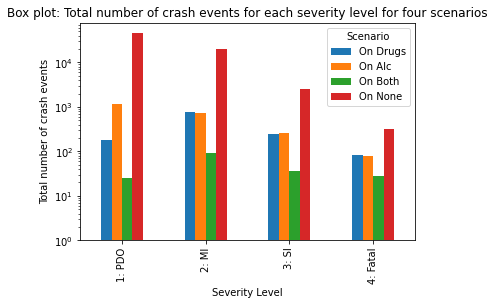

In [41]:
# plot

# for making it easy to plot, convert a spark dataframe to pandas dataframe
pandas_df = count_join_final_sort.toPandas()

# visualise the combined data with a bar graph
import matplotlib.pyplot as plt

# Use a logarithmic scale to compare the values easily, since the gap between the values is too large 

pandas_df.plot(x="Severity Level", kind="bar", log=True)
plt.ylabel("Total number of crash events")
plt.title("Box plot: Total number of crash events for each severity level for four scenarios")
plt.legend(title="Scenario")

#### &nbsp;&nbsp;  Answer:
From the plot shown above, it seems that as the severity level increased, the total number of crash events decreased. Furthermore, the drivers who have not been detected with alcohol and drugs, caused the most crash events at all severity levels among four scenarios. However, the number of the events from the normal driver decreased significantly, as the severity level increased. Similarly, the number of the events caused by drivers on alcohol, has been decreased as the level increased. Moreover, the number of accidents caused by people who were on drugs and those who were on both alcohol and drugs increased as the severity level increased from 1 to 2, but continued to decrease thereafter. Additionally, at the lowest severity level, there was a significant gap between the number of the crash events caused by the drivers on alcohol and the drivers on drugs, however, at higher severity levels, the two types have showed very similar values. On the other hand, even though the drivers on both alcohol and drugs caused the fewest crash events at all severity levels among the scenarios, they accounted for the highest share in all scenarios at the highest severity level.  
<br>
Overall, it can be seen that the higher the severity level, the lower the proportion of normal drivers in the entire scenarios. Conversely, the higher the level, the higher the proportion of drivers who were on drugs or alcohol, or on both. This suggests that drivers on alcohol or/and drugs can get more damages as the severity level increases compared to normal drivers.

Zero323. (2016, July 19). Multiple consecutive join with pyspark. Retrieved from https://stackoverflow.com/questions/38468568/multiple-consecutive-join-with-pyspark

Gaurang.S. (2018, June 21). Convert a spark DataFrame to pandas DF. Retrieved from https://stackoverflow.com/questions/50958721/convert-a-spark-dataframe-to-pandas-df

<a class="anchor" name="two4"></a>
## 2.4 RDDs vs DataFrame vs Spark SQL

Implement the following queries using RDDs, DataFrames and SparkSQL separately. Log the
time taken for each query in each approach using the “%%time” built-in magic command in
Jupyter Notebook and discuss the performance difference of these 3 approaches

#### 1. Find the Date and Time of Crash, Number of Casualties in each unit and the Gender, Age, License Type of the unit driver for the suburb "Adelaide". 
c.f. When displaying dates, please use the format (Year-Month-Dayofweek) E.g.(2017-January-Sunday).

<li> RDDs </li> 

In [42]:
rdd_crash_query = rdd_crash_1.map(lambda x: x.split(','))

In [43]:
%%time

# 1) with uncleaned data (Age)
# Index for "Suburb"= 2 in Crashes RDD
# Index for "No of Cas" = 2, "Age" = 8 in Units RDD

# "Suburb" = "ADELAIDE"
crash_ADE_ori = rdd_crash_query.filter(lambda x: x[2]=="ADELAIDE")

# "No of Cas" , "Age" = numeric values
unit_cas_age_ori = rdd_unit_query.filter(lambda x: x[2].isnumeric() == True and x[8].isnumeric() == True)

# join two RDDs by using key value pair RDDs
crash_join_1_ori = crash_ADE_ori.map(lambda x: (x[0],x[1:]))
unit_join_1_ori = unit_cas_age_ori.map(lambda x: (x[0],x[1:]))
rdd_join_1_ori = unit_join_1_ori.join(crash_join_1_ori)

# Show "Date"= "Year"-"Month"-"Day", "Time", "No of Cas", "Sex", "Age", "Licence Type"
final_rdd_1_ori = rdd_join_1_ori.map(lambda x : (x[1][1][9]+"-"+x[1][1][10]+"-"+x[1][1][11], x[1][1][12], int(x[1][0][1]), x[1][0][6], int(x[1][0][7]), x[1][0][10]))
final_rdd_1_ori.take(20)

CPU times: user 50.3 ms, sys: 4.27 ms, total: 54.6 ms
Wall time: 4.99 s


[('2016-November-Wednesday', '04:26 pm', 0, 'Male', 17, 'Unknown'),
 ('2016-November-Wednesday', '04:26 pm', 0, 'Male', 25, 'Unknown'),
 ('2016-December-Friday', '11:30 am', 0, 'Male', 80, 'Full'),
 ('2016-December-Friday', '11:30 am', 0, 'Male', 48, 'Full'),
 ('2016-December-Saturday', '07:40 am', 0, 'Male', 32, 'Full'),
 ('2016-December-Friday', '05:30 pm', 0, 'Female', 58, 'Full'),
 ('2016-December-Friday', '05:30 pm', 0, 'Male', 41, 'Full'),
 ('2016-December-Wednesday', '04:20 pm', 0, 'Female', 45, 'Full'),
 ('2016-December-Wednesday', '04:20 pm', 0, 'Male', 27, 'Full'),
 ('2016-December-Wednesday', '04:20 pm', 0, 'Male', 41, 'Full'),
 ('2016-December-Thursday', '01:15 pm', 0, 'Female', 21, 'Full'),
 ('2016-December-Friday', '11:25 am', 0, 'Male', 23, 'Full'),
 ('2016-December-Monday', '02:50 pm', 0, 'Female', 48, 'Full'),
 ('2016-February-Sunday', '04:50 pm', 0, 'Female', 33, 'Full'),
 ('2016-June-Monday', '06:50 pm', 0, 'Female', 22, 'Full'),
 ('2016-November-Friday', '09:30 am',

In [44]:
%%time

# 2) with cleaned data (Age)
# Index for "Suburb"= 2 in Crashes RDD
# Index for "No of Cas" = 2, "Age" = 8 in Units RDD

# "Suburb" = "ADELAIDE"
crash_ADE = rdd_crash_query.filter(lambda x: x[2]=="ADELAIDE")

# "No of Cas" , "Age" = numeric values
# Let's assume that the age limit for driving vehicles in Australia: 18 <= age <= 120
unit_cas_age = rdd_unit_query.filter(lambda x: x[2].isnumeric() == True 
                                                and x[8].isnumeric() == True and int(x[8])>=18 and int(x[8])<=120)

# join two RDDs by using key value pair RDDs
crash_join_1 = crash_ADE.map(lambda x: (x[0],x[1:]))
unit_join_1 = unit_cas_age.map(lambda x: (x[0],x[1:]))
rdd_join_1 = unit_join_1.join(crash_join_1)

# Show "Date"= "Year"-"Month"-"Day", "Time", "No of Cas", "Sex", "Age", "Licence Type"
final_rdd_1 = rdd_join_1.map(lambda x : (x[1][1][9]+"-"+x[1][1][10]+"-"+x[1][1][11], x[1][1][12], int(x[1][0][1]), x[1][0][6], int(x[1][0][7]), x[1][0][10]))
final_rdd_1.take(20)

CPU times: user 49.8 ms, sys: 7.72 ms, total: 57.5 ms
Wall time: 3.97 s


[('2016-November-Wednesday', '04:26 pm', 0, 'Male', 25, 'Unknown'),
 ('2016-December-Friday', '11:30 am', 0, 'Male', 80, 'Full'),
 ('2016-December-Friday', '11:30 am', 0, 'Male', 48, 'Full'),
 ('2016-December-Saturday', '07:40 am', 0, 'Male', 32, 'Full'),
 ('2016-December-Friday', '05:30 pm', 0, 'Female', 58, 'Full'),
 ('2016-December-Friday', '05:30 pm', 0, 'Male', 41, 'Full'),
 ('2016-December-Wednesday', '04:20 pm', 0, 'Female', 45, 'Full'),
 ('2016-December-Wednesday', '04:20 pm', 0, 'Male', 27, 'Full'),
 ('2016-December-Wednesday', '04:20 pm', 0, 'Male', 41, 'Full'),
 ('2016-December-Thursday', '01:15 pm', 0, 'Female', 21, 'Full'),
 ('2016-December-Friday', '11:25 am', 0, 'Male', 23, 'Full'),
 ('2016-December-Monday', '02:50 pm', 0, 'Female', 48, 'Full'),
 ('2016-February-Sunday', '04:50 pm', 0, 'Female', 33, 'Full'),
 ('2016-June-Monday', '06:50 pm', 0, 'Female', 22, 'Full'),
 ('2016-November-Friday', '09:30 am', 0, 'Male', 63, 'Full'),
 ('2016-November-Friday', '09:30 am', 0, 'M

Ahajib. (2017, March 15). pyspark merge two rdd together. Retrieved from https://stackoverflow.com/questions/42800009/pyspark-merge-two-rdd-together/42800399#42800399

<li> DataFrames </li>

In [45]:
from pyspark.sql.functions import concat, lit

In [46]:
%%time

# 1) with uncleaned data (Age)
# "Date" = "Year"-"Month"-"Day", "Time" in Crashes Dataframe
# "No of Cas", "Sex", "Age", "Licence Type" in Units Dataframe
# Where "Suburb" = "ADELAIDE" in Crashes Dataframe

# "Suburb" = "ADELAIDE"
crash_df_ADE_ori = crash_df.filter(col("Suburb") == "ADELAIDE")

# "Date" = "Year"-"Month"-"Day"  
crash_df_date_ori = crash_df_ADE_ori.withColumn("Date", concat(col("Year"),lit("-"),col("Month"),lit("-"),col("Day")))

# Change the datatype for "No of Cas" and "Age"
unit_df_type_ori = unit_df.withColumn("No of Cas", unit_df["No of Cas"].cast("int"))\
                           .withColumn("Age", unit_df["Age"].cast("int"))

# join two dataframes
join_df_1_ori = unit_df_type_ori.join(crash_df_date_ori, unit_df_type_ori.REPORT_ID== crash_df_date_ori.REPORT_ID, how='inner')

# Show "Date", "Time", "No of Cas", "Sex", "Age", "Licence Type"
final_df_1_ori = join_df_1_ori.select("Date", "Time", "No of Cas", "Sex", "Age", "Licence Type")

final_df_1_ori.show(20)

+--------------------+--------+---------+-------+----+------------+
|                Date|    Time|No of Cas|    Sex| Age|Licence Type|
+--------------------+--------+---------+-------+----+------------+
|2016-November-Wed...|01:45 pm|        0|   Male|  56|        Full|
|2016-November-Wed...|01:45 pm|        1|   Male|  72|        null|
|2016-November-Tue...|03:40 pm|        0|   Male|  56|        null|
|2016-November-Tue...|03:40 pm|        1| Female|  27|        null|
|2016-November-Tue...|05:00 pm|        0| Female|  32|        Full|
|2016-November-Tue...|05:00 pm|        0|Unknown|null|     Unknown|
|2016-November-Tue...|05:40 pm|        0|   Male|  22|     Unknown|
|2016-November-Tue...|05:40 pm|        0|   Male|  20|     Unknown|
|2016-November-Monday|11:26 pm|        0|Unknown|null|     Unknown|
|2016-November-Monday|11:26 pm|        0|   Male|  42|        Full|
|2016-November-Monday|11:26 pm|        0|   null|null|        null|
|2016-November-Monday|11:30 pm|        0|   Male

In [47]:
%%time

# 2) with cleaned data (Age)
# "Date" = "Year"-"Month"-"Day", "Time" in Crashes Dataframe
# "No of Cas", "Sex", "Age", "Licence Type" in Units Dataframe
# Where "Suburb" = "ADELAIDE" in Crashes Dataframe

# "Suburb" = "ADELAIDE"
crash_df_ADE = crash_df.filter(col("Suburb") == "ADELAIDE")

# "Date" = "Year"-"Month"-"Day"  
crash_df_date = crash_df_ADE.withColumn("Date", concat(col("Year"),lit("-"),col("Month"),lit("-"),col("Day")))

# Change the datatype for "No of Cas" and "Age"
unit_df_type = unit_df.withColumn("No of Cas", unit_df["No of Cas"].cast("int"))\
                       .withColumn("Age", unit_df["Age"].cast("int"))

# Let's assume that the age limit for driving vehicles in Australia: 18 <= age <= 120
unit_df_age = unit_df_type.filter((col("Age") >= 18)&(col("Age") <= 120))

# join two dataframes
join_df_1 = unit_df_age.join(crash_df_date, unit_df_age.REPORT_ID== crash_df_date.REPORT_ID, how='inner')

# Show "Date", "Time", "No of Cas", "Sex", "Age", "Licence Type"
final_df_1 = join_df_1.select("Date", "Time", "No of Cas", "Sex", "Age", "Licence Type")

final_df_1.show(20)

+--------------------+--------+---------+------+---+------------+
|                Date|    Time|No of Cas|   Sex|Age|Licence Type|
+--------------------+--------+---------+------+---+------------+
|2016-November-Wed...|01:45 pm|        0|  Male| 56|        Full|
|2016-November-Wed...|01:45 pm|        1|  Male| 72|        null|
|2016-November-Tue...|03:40 pm|        0|  Male| 56|        null|
|2016-November-Tue...|03:40 pm|        1|Female| 27|        null|
|2016-November-Tue...|05:00 pm|        0|Female| 32|        Full|
|2016-November-Tue...|05:40 pm|        0|  Male| 22|     Unknown|
|2016-November-Tue...|05:40 pm|        0|  Male| 20|     Unknown|
|2016-November-Monday|11:26 pm|        0|  Male| 42|        Full|
|2016-November-Monday|11:30 pm|        0|  Male| 26|     Unknown|
|2016-November-Monday|11:30 pm|        0|  Male| 38|        Full|
|2016-November-Monday|11:30 pm|        0|  Male| 36|        Full|
|2016-November-Tue...|05:05 pm|        0|  Male| 25|     Unknown|
|2016-Nove

Steven.B. (2018, March 21). In pyspark, how do you add/concat a string to a column?. Retrieved from https://stackoverflow.com/questions/49397966/in-pyspark-how-do-you-add-concat-a-string-to-a-column

<li> SparkSQL </li>

In [48]:
# Create Views from Dataframes
# SQL does not use original dataframes itself. 
# Instead, it will creat views and use these as sql dataframes.

unit_df.createOrReplaceTempView("sql_unit")
crash_df.createOrReplaceTempView("sql_crash")

In [49]:
%%time 

# 1) with uncleaned data(Age)
# "Date" = "Year"-"Month"-"Day", "Time" in Crashes SQL
# "No of Cas", "Sex", "Age", "Licence Type" in Units SQL
# Where "Suburb" = "ADELAIDE" in Crashes SQL

sql_1_ori = spark.sql('''
    SELECT c.Year ||"-"|| c.Month ||"-"|| c.Day as Date, c.Time, cast(u.`No of Cas` as int), u.Sex, cast(u.Age as int), u.`Licence Type`
    FROM sql_crash c JOIN sql_unit u ON c.REPORT_ID = u.REPORT_ID
    WHERE c.Suburb = "ADELAIDE"
''')

sql_1_ori.show(20)
 

+--------------------+--------+---------+-------+----+------------+
|                Date|    Time|No of Cas|    Sex| Age|Licence Type|
+--------------------+--------+---------+-------+----+------------+
|2016-November-Wed...|01:45 pm|        0|   Male|  56|        Full|
|2016-November-Wed...|01:45 pm|        1|   Male|  72|        null|
|2016-November-Tue...|03:40 pm|        0|   Male|  56|        null|
|2016-November-Tue...|03:40 pm|        1| Female|  27|        null|
|2016-November-Tue...|05:00 pm|        0| Female|  32|        Full|
|2016-November-Tue...|05:00 pm|        0|Unknown|null|     Unknown|
|2016-November-Tue...|05:40 pm|        0|   Male|  22|     Unknown|
|2016-November-Tue...|05:40 pm|        0|   Male|  20|     Unknown|
|2016-November-Monday|11:26 pm|        0|Unknown|null|     Unknown|
|2016-November-Monday|11:26 pm|        0|   Male|  42|        Full|
|2016-November-Monday|11:26 pm|        0|   null|null|        null|
|2016-November-Monday|11:30 pm|        0|   Male

In [50]:
%%time 

# 2) with cleaned data
# "Date" = "Year"-"Month"-"Day", "Time" in Crashes SQL
# "No of Cas", "Sex", "Age", "Licence Type" in Units SQL
# Where "Suburb" = "ADELAIDE" in Crashes SQL
# Let's assume that the age limit for driving vehicles in Australia: 18 <= age <= 120

sql_1 = spark.sql('''
    SELECT c.Year ||"-"|| c.Month ||"-"|| c.Day as Date, c.Time, cast(u.`No of Cas` as int), u.Sex, cast(u.Age as int), u.`Licence Type`
    FROM sql_crash c JOIN sql_unit u ON c.REPORT_ID = u.REPORT_ID
    WHERE c.Suburb = "ADELAIDE"
    AND cast(u.Age as int) BETWEEN 18 AND 120
''')

sql_1.show(20)
 

+--------------------+--------+---------+------+---+------------+
|                Date|    Time|No of Cas|   Sex|Age|Licence Type|
+--------------------+--------+---------+------+---+------------+
|2016-November-Wed...|01:45 pm|        0|  Male| 56|        Full|
|2016-November-Wed...|01:45 pm|        1|  Male| 72|        null|
|2016-November-Tue...|03:40 pm|        0|  Male| 56|        null|
|2016-November-Tue...|03:40 pm|        1|Female| 27|        null|
|2016-November-Tue...|05:00 pm|        0|Female| 32|        Full|
|2016-November-Tue...|05:40 pm|        0|  Male| 22|     Unknown|
|2016-November-Tue...|05:40 pm|        0|  Male| 20|     Unknown|
|2016-November-Monday|11:26 pm|        0|  Male| 42|        Full|
|2016-November-Monday|11:30 pm|        0|  Male| 26|     Unknown|
|2016-November-Monday|11:30 pm|        0|  Male| 38|        Full|
|2016-November-Monday|11:30 pm|        0|  Male| 36|        Full|
|2016-November-Tue...|05:05 pm|        0|  Male| 25|     Unknown|
|2016-Nove

<font color = red> https://community.cloudera.com/t5/Community-Articles/Spark-RDDs-vs-DataFrames-vs-SparkSQL/ta-p/246547

#### 2. Find the total number of casualties for each suburb when the vehicle was driven by an unlicensed driver. You are required to display the name of the suburb and the total number of casualties.

<li> RDDs </li>

In [51]:
%%time

# Indices for each attribute we will use
# "Licence Type"= 11 in Units RDD
# "Suburb"= 2, "Total Cas" = 6 in Crashes RDD

# "Licence Type"= "Unlicenced"
unit_unlic = rdd_unit_query.filter(lambda x: x[11]=="Unlicenced")

# "Total Cas" = numeric values
crash_cas = rdd_crash_query.filter(lambda x: x[6].isnumeric() == True)

# join two RDDs by using key value pair RDDs
unit_join_2 = unit_unlic.map(lambda x: (x[0],x[1:]))
crash_join_2 = crash_cas.map(lambda x: (x[0],x[1:]))
rdd_join_2 = unit_join_2.join(crash_join_2)

# create a key value pair RDD = ("Suburb", "Total Cas"), change the datatype of "Total Cas"
sub_cas_pair = rdd_join_2.map(lambda x: (x[1][1][1], int(x[1][1][5])))

# sum of total number of casualties for each suburb
sub_cas_sum = sub_cas_pair.groupByKey().mapValues(lambda x: sum(x))

sub_cas_sum.take(20)

CPU times: user 75.3 ms, sys: 6.79 ms, total: 82.1 ms
Wall time: 5.32 s


[('HAPPY VALLEY', 5),
 ('MUNNO PARA WEST', 1),
 ('HEATHPOOL', 3),
 ('NORTH PLYMPTON', 1),
 ('WHITES FLAT', 0),
 ('CRAIGMORE', 2),
 ('PARALOWIE', 4),
 ('BIRKENHEAD', 2),
 ('BERRI', 3),
 ('CLOVELLY PARK', 1),
 ('DAVOREN PARK', 8),
 ('HACKHAM', 3),
 ('MODBURY NORTH', 3),
 ('FULLARTON', 0),
 ('ONKAPARINGA HILLS', 7),
 ('FIRLE', 6),
 ('RIVERGLADES', 1),
 ('SALISBURY PARK', 0),
 ('URRBRAE', 2),
 ('LINDEN PARK', 1)]

<li> DataFrames </li>

In [52]:
unit_df_new = unit_df

In [53]:
%%time 

# "Licence Type"= "Unlicenced"
unit_df_unlic = unit_df_new.filter(col("Licence Type") == "Unlicenced")

# join two dataframes
join_df_2 = crash_df.join(unit_df_unlic, crash_df.REPORT_ID== unit_df_unlic.REPORT_ID, how='inner')

# change the datatype of "Total Cas" Column 
join_type = join_df_2.withColumn("Total Cas", join_df_2["Total Cas"].cast("int"))

# groupby "Suburb", calculate "Total Cas", return "Suburb" and "Total Cas"
final_df_2 = join_type.groupby("Suburb").agg(F.sum("Total Cas").alias("Total_number_of_casualties"))

final_df_2.show(20)

+-------------------+--------------------------+
|             Suburb|Total_number_of_casualties|
+-------------------+--------------------------+
|      FLINDERS PARK|                         8|
|       POOGINAGORIC|                         1|
|     TEA TREE GULLY|                         1|
|            HACKHAM|                         3|
|   MEDINDIE GARDENS|                         0|
|           WISANGER|                         1|
|            CUMMINS|                         0|
|       BASKET RANGE|                         0|
|MURRAY BRIDGE SOUTH|                         0|
|      GILLES PLAINS|                         7|
|             HAWKER|                         0|
|           BEAUFORT|                         1|
|             MAGILL|                         7|
|            ECHUNGA|                         1|
|            CULTANA|                         1|
|        EDWARDSTOWN|                         6|
|        RISDON PARK|                         1|
|          THORNGATE

<li> SparkSQL </li>

In [54]:
%%time

# "Licence Type"= "Unlicenced", groupby "Suburb", calculate "Total Cas", return "Suburb" and "Total Cas"
sql_2 = spark.sql('''
    SELECT c.Suburb, SUM(cast(c.`Total Cas` as int)) as Total_number_of_casualties
    FROM sql_crash c JOIN sql_unit u ON c.REPORT_ID = u.REPORT_ID
    WHERE u.`Licence Type` = "Unlicenced"
    GROUP BY c.Suburb
''')

sql_2.show(20)

+-------------------+--------------------------+
|             Suburb|Total_number_of_casualties|
+-------------------+--------------------------+
|      FLINDERS PARK|                         8|
|       POOGINAGORIC|                         1|
|     TEA TREE GULLY|                         1|
|            HACKHAM|                         3|
|   MEDINDIE GARDENS|                         0|
|           WISANGER|                         1|
|            CUMMINS|                         0|
|       BASKET RANGE|                         0|
|MURRAY BRIDGE SOUTH|                         0|
|      GILLES PLAINS|                         7|
|             HAWKER|                         0|
|           BEAUFORT|                         1|
|             MAGILL|                         7|
|            ECHUNGA|                         1|
|            CULTANA|                         1|
|        EDWARDSTOWN|                         6|
|        RISDON PARK|                         1|
|          THORNGATE

<li> Comparing three methods </li>

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Answer:
 
$Performance: Spark SQL  $$\geq$$  DataFrame > RDDs$
<br>
<br>
From the two examples shown above, it seems that SparkSQL and DataFrames, especially SparkSQL with analysis involving aggregation and sorting, yield better performance results than RDDs for joining datasets. This is because, even though RDD was able to speed up processing through in-memory data processing, it is difficult to optimize efficiency for joining operations by using RDDs, since users have to control the processing directly. Furthermore, when developing Spark applications, RDD uses SparkContext, while DataFrame and SparkSQL use SparkSession objects. In other words, since SparkSQL and Dataframe use the same engine, featuring the Catalyst optimizer, the joining processing performance of them is similar to each other's, and faster than RDDs'. 

Bmathew. (2016, June 28). Spark RDDs vs DataFrames vs SparkSQL. Retrieved from https://community.cloudera.com/t5/Community-Articles/Spark-RDDs-vs-DataFrames-vs-SparkSQL/ta-p/246547